<a href="https://colab.research.google.com/github/chungngoc/Data-Augmentation/blob/main/Fuzzy_C_Mean_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

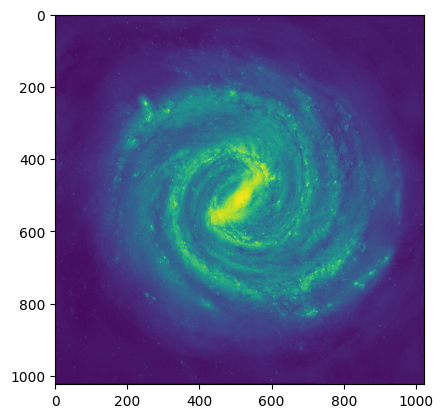

(1024, 1024)


In [34]:
img_path = "/content/milky-way.jpg"

img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()

print(img.shape)

In [35]:
print(img)

[[13 11 16 ... 13 15 19]
 [14 12 16 ... 11 13 15]
 [14 11 15 ... 14 15 15]
 ...
 [ 2  2  2 ... 13 13 14]
 [ 1  0  0 ... 12 11 11]
 [ 2  2  1 ... 13 12 11]]


In [4]:
k = 2 # Number cluster
m = 2 # Parameter fuzzy

# Initialize centroids
C = np.random.randint(0, 255, size=k)
print("Centroid : ",C)

nb_pixels = img.size
print(nb_pixels)
img_flatten = img.flatten().astype('float')

# Initialize matrix of membership
U = np.random.rand(k, nb_pixels)
U = U / U.sum(axis=0) # The sum of each column equal 1
print("Membership: ", U)

Centroid :  [197  47]
1048576
Membership:  [[0.08261485 0.59146831 0.48500466 ... 0.44992114 0.43366103 0.37878633]
 [0.91738515 0.40853169 0.51499534 ... 0.55007886 0.56633897 0.62121367]]


In [5]:
def update_centroids(membership, centroids, img_flatten, m):
  """
  membership : matrix of size k x number_pixel
  centroids : old centroids avec k points
  """
  k = centroids.shape[0]
  centroids = np.dot(membership**m, img_flatten) / np.sum(membership**m,axis=1)

  return centroids

In [6]:
def update_membership(centroids, img_flatten, m):
  C_new, pixels_new = np.meshgrid(centroids, img_flatten)
  power = 2 / (m-1)
  p1 = np.abs(C_new - pixels_new)**power
  p2 = np.sum((1./np.abs(C_new - pixels_new))**power,axis=1)

  membership = np.transpose(1./(p1*p2[:,None]))
  return membership


In [7]:
def cluster_image(U, C, img, m, epsilon, max_iter):
  d = 1
  i = 0 # Number of iteration
  img_flatten = img.flatten().astype('float')
  while d > epsilon:
    C = update_centroids(U, C, img_flatten, m) # Update centroids

    old_u = np.copy(U)
    U = update_membership(C, img_flatten, m) # Update memberships
    d = np.sum(abs(U - old_u))

    print("Iteration %d : cost = %f" %(i, d))
    i+=1
    if d < epsilon or i > max_iter:
      break

  cluster_membership = np.argmax(U, axis=0)

  result = cluster_membership.reshape(img.shape).astype('int')
  return result



In [23]:
epsilon, max_iter = 0.00001, 1000
k = 5 # Number cluster
m = 2 # Parameter fuzzy

# Initialize centroids
C = np.random.randint(0, 255, size=k)
print("Centroid : ",C)

nb_pixels = img.size

img_flatten = img.flatten().astype('float')

# Initialize matrix of membership
U = np.random.rand(k, nb_pixels)
U = U / U.sum(axis=0) # The sum of each column equal 1
print("Membership: ", U)

result = cluster_image(U, C, img, m, epsilon, max_iter)

print(result.shape)

Centroid :  [ 11   0 208 102  23]
Membership:  [[0.02373527 0.36846614 0.32649743 ... 0.00751669 0.27454916 0.11855868]
 [0.3022663  0.01553381 0.18795006 ... 0.16911719 0.17220949 0.27893529]
 [0.32878183 0.09938857 0.28689284 ... 0.28113622 0.07485611 0.18099465]
 [0.25724005 0.07834689 0.18622528 ... 0.32526204 0.2747376  0.09688759]
 [0.08797655 0.4382646  0.01243439 ... 0.21696786 0.20364763 0.32462379]]
Iteration 0 : cost = 485172.997927
Iteration 1 : cost = 15026.552887
Iteration 2 : cost = 53803.989399
Iteration 3 : cost = 164762.102624
Iteration 4 : cost = 384210.333349
Iteration 5 : cost = 578491.936139
Iteration 6 : cost = 649922.817904
Iteration 7 : cost = 503381.752573
Iteration 8 : cost = 269938.223062
Iteration 9 : cost = 146930.685334
Iteration 10 : cost = 100810.574230
Iteration 11 : cost = 81798.114453
Iteration 12 : cost = 75384.906534
Iteration 13 : cost = 71032.566424
Iteration 14 : cost = 67193.479986
Iteration 15 : cost = 63708.579877
Iteration 16 : cost = 60367.

In [16]:
print(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


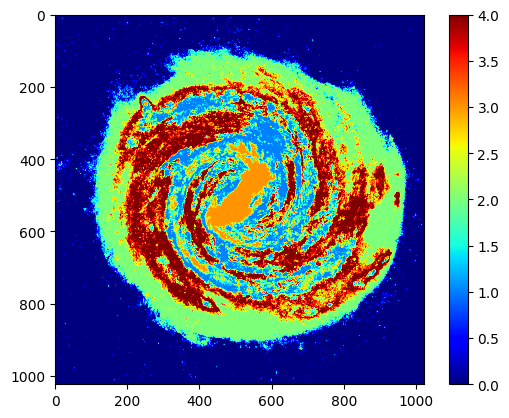

In [30]:
plt.imshow(result, cmap='jet')
plt.colorbar()
plt.show()

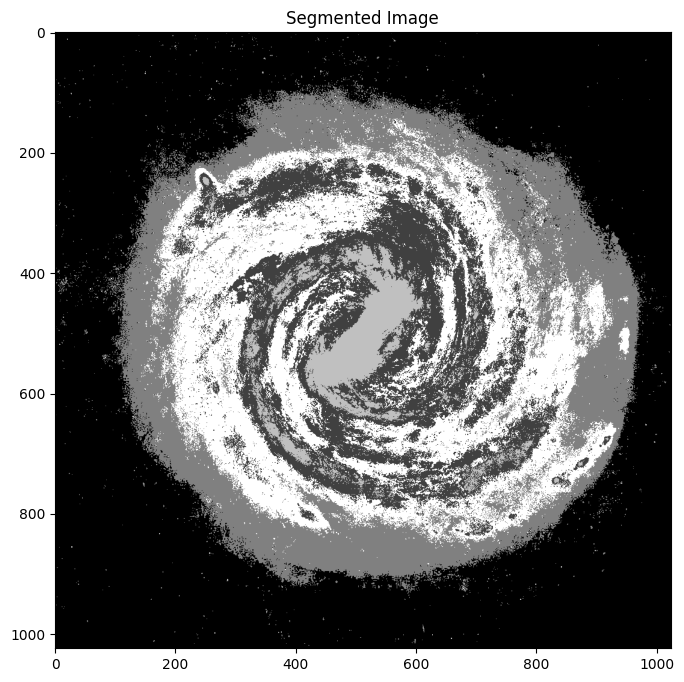

In [25]:
plt.figure(figsize=(8, 8))
plt.title('Segmented Image')
plt.imshow(result, cmap='gray')
plt.show()

In [29]:
np.random.rand(3)

array([0.53921234, 0.20663592, 0.76777752])

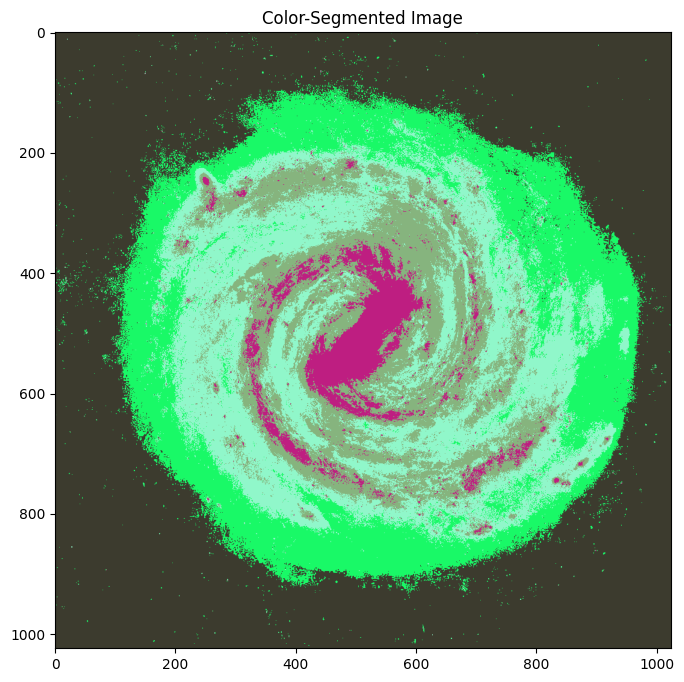

In [27]:
colored_segmented_image = np.zeros((img.shape[0], img.shape[1], 3))

# Assign colors to each cluster
for i in range(k):
    colored_segmented_image[result == i] = np.random.rand(3)

# Display the color-segmented image
plt.figure(figsize=(8, 8))
plt.title('Color-Segmented Image')
plt.imshow(colored_segmented_image)
plt.show()